<a href="https://colab.research.google.com/github/mvish7/PyTorch/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 The objective of the regression task is to explain and make adequate predictions based on the linear relation with an independent variable
 
 The simplest form of the linear regression equation is defined by:

Ŷ = bX + a + e
where,



Ŷ = Predicted value of Y

X = Independent variable

b = Slope coefficient based on best-fitting line

a = Y-axis intercept

e = Error term




**Model Structure**


In [0]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F
import matplotlib.pyplot as plt

In [0]:
x_data = Variable(torch.Tensor([[10.0], [9.0], [3.0], [2.0]]))

In [0]:
y_data = Variable(torch.Tensor([[90.0], [80.0], [50.0], [30.0]]))

In order to set up the model class, we need to initialize the model type and declare the forward pass. Since our model takes one independent variable and makes one prediction for the Ŷ variable at a time, we initialize our model with this linear layer: torch.nn.Linear(1, 1) , where the first 1 is for the input size, and the second 1 is for the output size.


---

Next is to define the forward pass function. The forward pass refers to the calculation process of the output data from the input. We simply define as below. The function takes x as its input and outputs the predicted value of Y, y_pred .

In [0]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
      
model = LinearRegression()

super():  at a high level super() gives you access to methods in a superclass from the subclass that inherits from it.
more into at https://realpython.com/python-super/

**Loss Function (Criterion)**

In [0]:
criterion = torch.nn.MSELoss(reduction='sum') 
#about MSE loss https://pytorch.org/docs/stable/nn.html#torch.nn.MSELoss

Next, we will use Stochastic Gradient Descent (SGD) optimizer for the update of hyperparameters. model.parameters() will provide the learnable parameters to the optimizer and lr=0.01 defines the learning rates for the parameter updates.

In [0]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
#about optimisers https://pytorch.org/docs/stable/optim.html

**model training**

In [0]:
for epoch in range(20):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    y_pred = model(x_data)
    
    # Compute Loss
    loss = criterion(y_pred, y_data)
    
    # Backward pass
    loss.backward()
    optimizer.step()

We first need to set our gradient to zero: optimizer.zero_grad() . This is because every time a variable is back propagated through, the gradient will be accumulated instead of being replaced.


---

Then optimizer.step() performs a parameter update based on the current gradient.


In [0]:
new_x = Variable(torch.Tensor([[45.0]]))
y_pred = model(new_x)
print("predicted Y value: ", y_pred.data[0][0])

predicted Y value:  tensor(-1.0459e+12)


In [0]:
x_data.data.numpy()

array([[10.],
       [ 9.],
       [ 3.],
       [ 2.]], dtype=float32)

In [28]:
y_data.data.numpy()

array([[90.],
       [80.],
       [50.],
       [30.]], dtype=float32)

Text(0, 0.5, 'y_data')

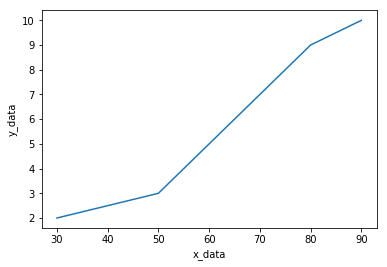

In [31]:
plt.plot(y_data.data.numpy(),x_data.data.numpy())
plt.xlabel('x_data')
plt.ylabel('y_data')

In [0]:
t=torch.as_tensor([[2,3],[4,6],[67,98],[1,90]])
a=t.data